# Analyser les écarts de performance entre départements
## Problématique métiers

### Une entreprise souhaite analyser les écarts de performance entre ses départements en explorant les relations entre variables qualitatives(départements, satisfaction) et quantitatives (scores de performance,heures travaillées).

## Objectifs 
### Valider les différences observées en appliquant des tests statistiques adaptés.

### Importons les bibliothèques

In [ ]:
import pandas as pd 
import scipy.stats  as st
import seaborn as sns
import matplotlib.pyplot as plt

### Importons les données

In [4]:
df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')

In [5]:
### Aperçu
df.head(10)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
5,6,IT,Male,43,Manager,2016-08-14 08:03:05.556036,8,High School,3,7800.0,46,31,8,0,100,15,95,0,2.77,False
6,7,IT,Male,37,Technician,2023-08-28 08:03:05.556036,1,Bachelor,5,5250.0,55,20,29,2,0,16,27,0,4.46,False
7,8,Engineering,Female,55,Engineer,2014-10-27 08:03:05.556036,9,Bachelor,2,7200.0,42,46,7,8,100,7,64,0,2.09,False
8,9,Marketing,Female,55,Technician,2023-06-29 08:03:05.556036,1,High School,2,4200.0,51,23,21,14,0,1,0,1,1.44,False
9,10,Engineering,Female,45,Consultant,2016-12-23 08:03:05.556036,7,Bachelor,1,6050.0,41,33,2,6,75,4,53,2,2.93,False


### Métadonées

In [7]:
df.shape # Nombre de lignes et colonnes

(100000, 20)

In [8]:
df.info() # infos générales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

### Nétoyage et Transformation des données

- Suppression des colonnes inutiles

In [11]:

df = df.drop([
   'Hire_Date','Employee_ID','Remote_Work_Frequency'
], axis=1)


In [12]:
### Aperçu
df.head(10)

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,IT,Male,55,Specialist,2,High School,5,6750.0,33,32,22,2,14,66,0,2.63,False
1,Finance,Male,29,Developer,0,High School,5,7500.0,34,34,13,14,12,61,2,1.72,False
2,Finance,Male,55,Specialist,8,High School,3,5850.0,37,27,6,3,10,1,0,3.17,False
3,Customer Support,Female,48,Analyst,7,Bachelor,2,4800.0,52,10,28,12,10,0,1,1.86,False
4,Engineering,Female,36,Analyst,3,Bachelor,2,4800.0,38,11,29,13,15,9,1,1.25,False
5,IT,Male,43,Manager,8,High School,3,7800.0,46,31,8,0,15,95,0,2.77,False
6,IT,Male,37,Technician,1,Bachelor,5,5250.0,55,20,29,2,16,27,0,4.46,False
7,Engineering,Female,55,Engineer,9,Bachelor,2,7200.0,42,46,7,8,7,64,0,2.09,False
8,Marketing,Female,55,Technician,1,High School,2,4200.0,51,23,21,14,1,0,1,1.44,False
9,Engineering,Female,45,Consultant,7,Bachelor,1,6050.0,41,33,2,6,4,53,2,2.93,False


- Recherche de valeurs vides

In [14]:
df.dropna().shape

(100000, 17)

- Recherche de doublons

In [16]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [17]:
df.describe()

,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,10.013560,49.506060,0.999720,2.999088
std,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,5.495405,28.890383,0.815872,1.150719
min,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,5.000000,25.000000,0.000000,2.010000
50%,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,10.000000,49.000000,1.000000,3.000000
75%,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,15.000000,75.000000,2.000000,3.990000
max,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,19.000000,99.000000,2.000000,5.000000


- Ajoutons une catégorie pour les satisfactions

In [19]:
bins = [0, 2, 3, 4, 5]
labels = ["Unsatisfied", "Neutral", "Satisfied", "Very Satisfied"] 
df['Satisfaction_Category'] = pd.cut(df['Employee_Satisfaction_Score'], bins=bins, labels=labels, include_lowest=True) 

- Attribuons le bon Type aux colonnes

In [21]:
df['Department'] = df['Department'].astype('string') #chaine de caractère
df['Gender'] = df['Gender'].astype('string')
df['Education_Level'] = df['Education_Level'].astype('string')
df['Job_Title'] = df['Job_Title'].astype('string')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Department                   100000 non-null  string  
 1   Gender                       100000 non-null  string  
 2   Age                          100000 non-null  int64   
 3   Job_Title                    100000 non-null  string  
 4   Years_At_Company             100000 non-null  int64   
 5   Education_Level              100000 non-null  string  
 6   Performance_Score            100000 non-null  int64   
 7   Monthly_Salary               100000 non-null  float64 
 8   Work_Hours_Per_Week          100000 non-null  int64   
 9   Projects_Handled             100000 non-null  int64   
 10  Overtime_Hours               100000 non-null  int64   
 11  Sick_Days                    100000 non-null  int64   
 12  Team_Size                    100000 non-null 

## Analyse Quali-Quali

### Question 1

 la démission des employés dépend du département dans lequel ils travaillent ?

H0: La démission des employés est indépendante du département.   
H1: La démission des employés dépend du département.

### Tableau de contingence

In [28]:
contingency_table = pd.crosstab(df["Department"], df["Resigned"])

In [29]:
contingency_table

Resigned,False,True
Department,,
Customer Support,10018,1098
Engineering,9899,1057
Finance,10020,1180
HR,9835,1125
IT,10067,1064
Legal,9982,1136
Marketing,10091,1125
Operations,10060,1121
Sales,10018,1104


### Test de khi-2

$$ \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}} $$

In [32]:
chi2, p, dof, expected = st.chi2_contingency(contingency_table)

print(f"Chi2 = {chi2:.2f}")
print(f"P-value = {p:.4f}")

Chi2 = 9.18
P-value = 0.3274


### La P value est > 0,05 l'Hypothèse H0 est acceptée la démission des employés est indépendante du département.

<Figure size 1000x600 with 0 Axes>

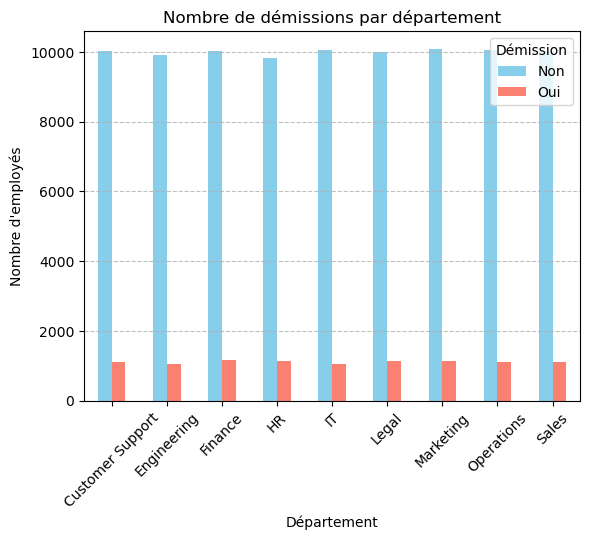

In [34]:
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.title("Nombre de démissions par département")
plt.xlabel("Département")
plt.ylabel("Nombre d'employés")
plt.legend(title="Démission", labels=['Non', 'Oui'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

Le graphe montre répartition sensiblement égale des démissions dans les départements

### Question 2

la répartition des genres est équitable entre les départements?

H0: Le genre est indépendant du département.  
H1: Il existe une association entre le genre et le département.

### Tableau de contingence

In [40]:
contingency_table = pd.crosstab(df["Department"], df["Gender"])
contingency_table

Gender,Female,Male,Other
Department,,,
Customer Support,5240,5486,390
Engineering,5229,5293,434
Finance,5381,5349,470
HR,5260,5221,479
IT,5315,5366,450
Legal,5401,5292,425
Marketing,5397,5383,436
Operations,5398,5339,444
Sales,5380,5302,440


### Test khi2

In [42]:
chi2, p, dof, expected = st.chi2_contingency(contingency_table)

print(f"Chi2 = {chi2:.2f}")
print(f"P-value = {p:.4f}")

Chi2 = 21.89
P-value = 0.1469


### La P value est > 0,05 l'Hypothèse H0 est acceptée la répartition des genres est indépendante du département

<Figure size 1000x600 with 0 Axes>

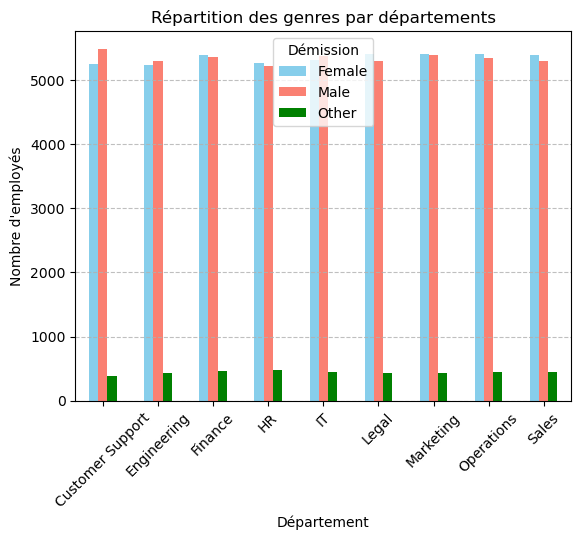

In [44]:
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=False, color=['skyblue', 'salmon','green'])
plt.title("Répartition des genres par départements")
plt.xlabel("Département")
plt.ylabel("Nombre d'employés")
plt.legend(title="Démission", labels=['Female', 'Male','Other'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

### Question 3

La satisfaction des employés dépend-elle du département ?

H0: La satisfaction des employés est indépendante du département   
H1: Il existe une relation significative entre les employés et le département

### Tableau de contingence

In [49]:
contingency_table = pd.crosstab(df["Department"], df["Satisfaction_Category"])
contingency_table


Satisfaction_Category,Unsatisfied,Neutral,Satisfied,Very Satisfied
Department,,,,
Customer Support,2885,2819,2732,2680
Engineering,2680,2844,2731,2701
Finance,2745,2896,2782,2777
HR,2741,2711,2868,2640
IT,2707,2780,2790,2854
Legal,2829,2784,2794,2711
Marketing,2804,2862,2787,2763
Operations,2667,2854,2840,2820
Sales,2834,2766,2733,2789


### Test khi2

In [51]:
chi2, p, dof, expected = st.chi2_contingency(contingency_table)

print(f"Chi2 = {chi2:.2f}")
print(f"P-value = {p:.4f}")

Chi2 = 40.53
P-value = 0.0188


### La P value est < 0,05 l'Hypothèse H0 est rejetée. Il existe une relation  entre la satisfation des employés et le département

### Calculons le V de Cramer pour évaluer la force de cette dépendance

$$ V = \sqrt{\frac{\chi^2}{n \times \min(k-1, r-1)}} $$

In [55]:
n = contingency_table.values.sum()  # Nombre total d'observations
n

100000

In [56]:
m = min(contingency_table.shape) -1 # m = min(k-1, r-1)
m

3

In [57]:
from math import sqrt
V = chi2/sqrt(n*m)
V


0.07399132219990667

### La relation est faible

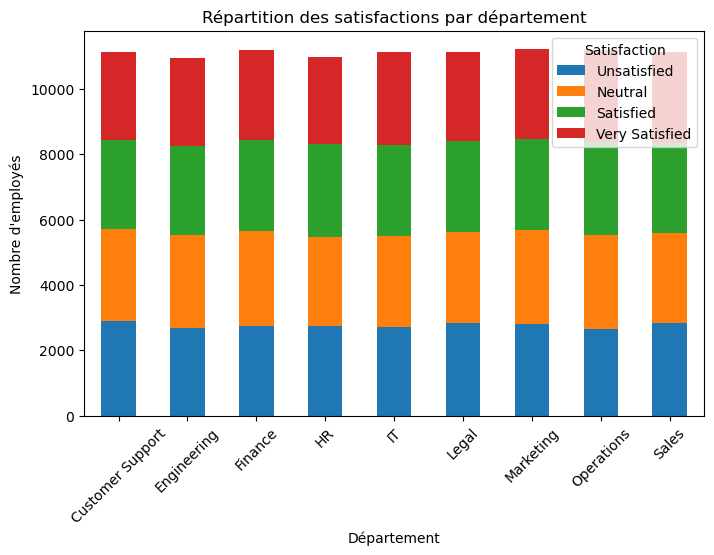

In [59]:
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 5))

plt.title("Répartition des satisfactions par département")
plt.xlabel("Département")
plt.ylabel("Nombre d'employés")
plt.xticks(rotation=45)
plt.legend(title="Satisfaction")
plt.show()

## Analyse Quali-Quanti


### Question 4

Les scores de performance diffèrent-ils selon
le département ?

Groupons les scores de performances par départements

In [64]:
departments = df['Department'].unique()
groups = [df[df['Department'] == dept]['Performance_Score'] for dept in departments]

### Test de Kolmogorov-Smirnov (KS)

In [66]:

D,p = st.kstest(df['Performance_Score'].values,'norm')
print(p)

0.0


### Test de D’Agostino et Pearson

In [68]:
stat, p = st.normaltest(df['Performance_Score'].values)
print(p)

0.0


p < 0,05 la distribution n'est pas normale tournons nous vers un test non paramétrique.  
mais avant, vérifions d'abord  le normalité graphiquement.  
le fait que nous ayons 10000 valeurs peut 
pertuber notre test de normalité

C:\Users\jeff\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


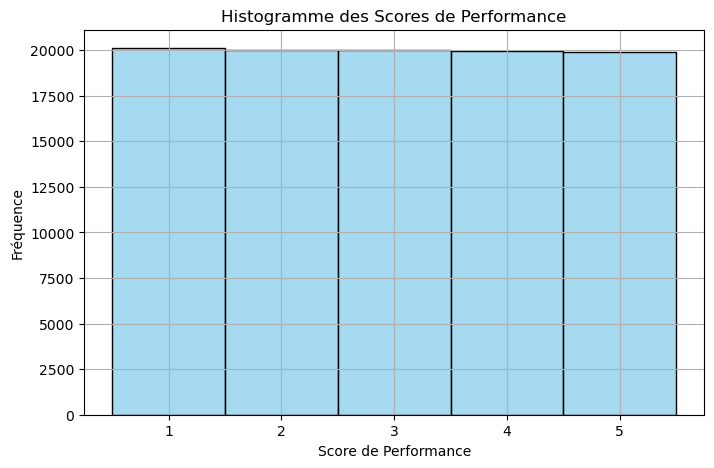

In [70]:

plt.figure(figsize=(8, 5))
sns.histplot(df['Performance_Score'], bins=[1,2,3,4,5,6], color='skyblue', edgecolor='black', discrete=True)

plt.title("Histogramme des Scores de Performance")
plt.xlabel("Score de Performance")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

Notre histogramme ne montre pas une distribution en cloche  
ce qui confirme une fois de plus que la distribution n'est  
pas normale

### Kruskal-Wallis

H0:  la distribution des scores de performance est identique dans tous les départements.   
H1:  au moins un département a une distribution différente.

In [74]:
stat, p_value = st.kruskal(*groups)

print(f"Statistique H : {stat:.4f}")
print(f"p-value : {p_value:.4f}")

Statistique H : 7.6579
p-value : 0.4676


###  Avec une p-value de 0.4676 >> 0.05, on ne peux pas rejeter l’hypothèse nulle.

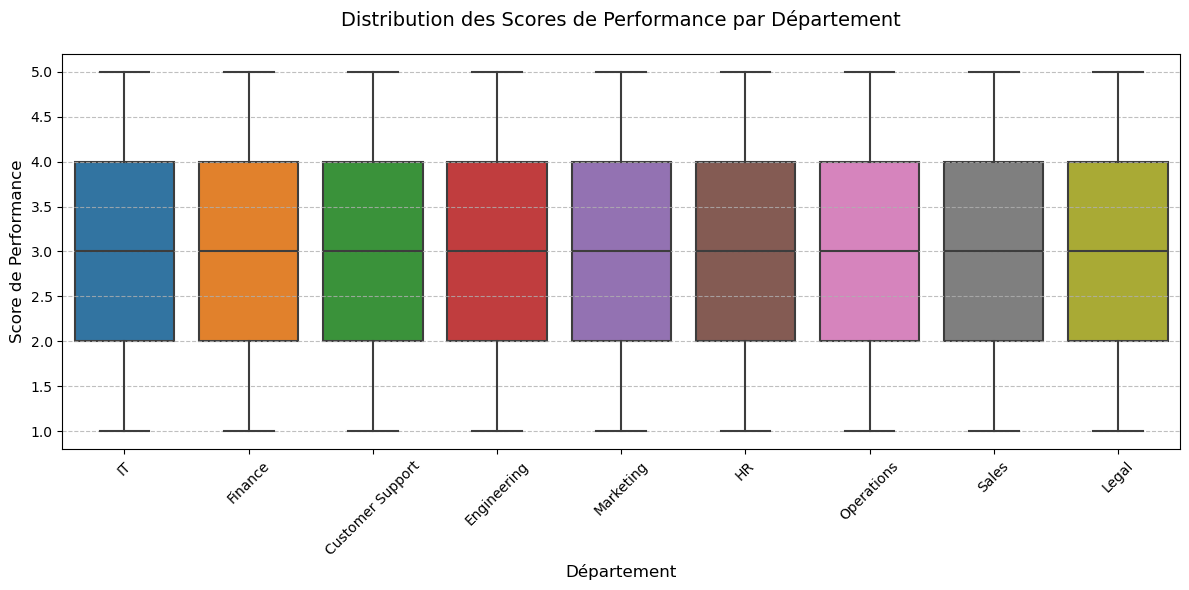

In [76]:
plt.figure(figsize=(12, 6)) 
boxplot = sns.boxplot(
    x='Department', 
    y='Performance_Score', 
    data=df,   
)

# Personnalisation avancée
plt.title("Distribution des Scores de Performance par Département", fontsize=14, pad=20)
plt.xlabel("Département", fontsize=12)
plt.ylabel("Score de Performance", fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.8) 

plt.tight_layout()
plt.show()

La distribution est similaire entre les départements, les quartiles sont très proche et pas de valeur aberrante  
Pas de différences marquées entre les départements sur les scores de performance.  
la variable Department n’a pas d’effet significatif sur Performance_Score ce qui confirme le test de  *Kruskal-Wallis*

## Analyse Quanti-Quanti  

### Question 4  


Les scores de performance diffèrent-ils selon
le salaire? 

H0:  le salaire et le score de performance sont indépendants.   
H1:  Il y a une association significative entre le salaire et le score de performance.


### Corrélation de Spearman

In [80]:
corr, p_value = st.spearmanr(df['Performance_Score'], df['Monthly_Salary'])
print(f"Corrélation de Spearman : {corr:.3f}, p-value = {p_value:.4f}")

Corrélation de Spearman : 0.478, p-value = 0.0000


p-value = 0.0000 (très inférieure à 0.05) : Nous rejetons l'hypothèse 0.  
ρ = 0.478 :  Il y a une corrélation monotone modérée positive entre les salaires et les scores de performance.

C:\Users\jeff\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeff\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


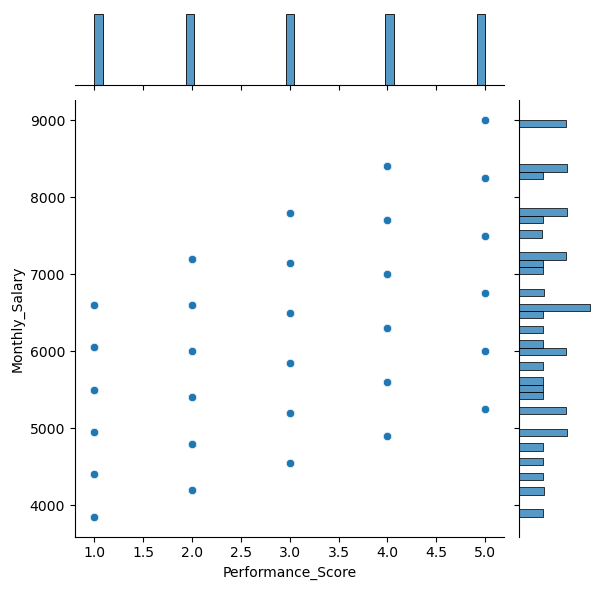

In [82]:

sns.jointplot(x='Performance_Score', y='Monthly_Salary', data=df, kind='scatter', height=6)
plt.show()

### Observations
Une corrélation positive modérée est visible (confirmée par ρ=0.478) : les scores élevés tendent à correspondre à des salaires plus élevés.  
Quelques employés avec des scores bas (1.0-2.0) mais salaires >5000 → Anomalies à investiguer.  

### Recommandations RH  
Vérifier si les salaires sont bien alignés avec les politiques de récompense.  
Un score de 5.0 devrait avoir un salaire clairement supérieur à un score de 3.0.   Justification (ancienneté ? compétences rares ? Diplome?)  


### Question 5

Les scores de performance sont-ils f
les heures supplémentaires 

H0: Les scores de performance et les heures supplémentaires  sont indépendants.  
H1:  Il y a une association significative entre Les scores de performance et les heures supplémentaires.


In [85]:
corr, p_value = st.spearmanr(df['Performance_Score'], df['Overtime_Hours'])
print(f"Corrélation de Spearman : {corr:.3f}, p-value = {p_value:.4f}")

Corrélation de Spearman : -0.001, p-value = 0.6777


### Avec une p-value de 0.6777 > 0.05, on ne peux pas rejeter l’hypothèse nulle.

C:\Users\jeff\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeff\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


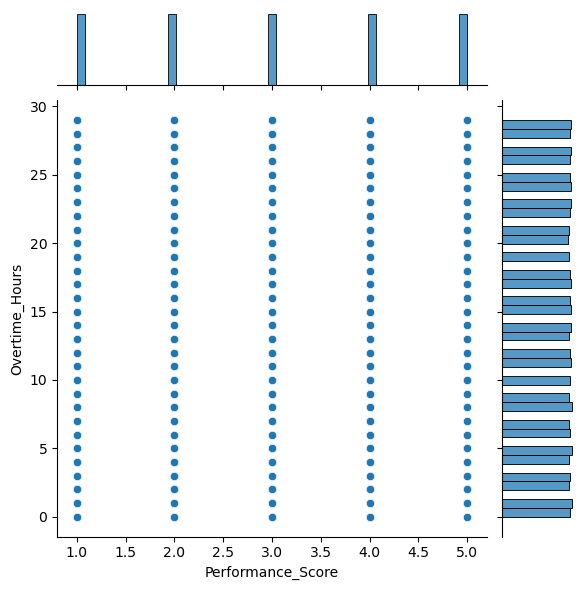

In [87]:
sns.jointplot(x='Performance_Score', y='Overtime_Hours', data=df, kind='scatter', height=6)
plt.show()

Ce graphique illustre visuellement une absence de relation claire entre les deux variables    
les points sont très alignés verticalement,  suggérant que peu importe la performance,   
les heures supplémentaires sont réparties de manière assez homogène.